In [4]:
from PIL import Image

## 常用命令
* 命令模式：Esc
* 编辑模式：Enter	
* 运行本单元，选择下行单元：	shift + enter
* 运行本单元：	control + enter
* 运行本单元，插入下行新单元： ⌥（option） + enter
* 更改单元格为Code：Y
* 更改单元格为Markdown：M

# 图像类基操

## Image类基本操作

In [5]:
im = Image.open('images/ross.jpg',mode="r")

In [6]:
im.show()

In [7]:
# 图片颜色，默认值为 0 表示黑色，参数值支持(R,G,B)三元组数字格式、颜色的十 六进制值以及颜色英文单词
im = Image.new(mode='RGB', size=(100, 100), color=(255, 123, 123))
im.show()

In [8]:
# format to use is determined from the filename extension. 不用硬指定格式
im.save('./images/2.png')

In [9]:
im = Image.open('images/ross.jpg')
im.size

(820, 613)

In [10]:
im.show()

In [11]:
# factor_x = int((box[2] - box[0]) / size[0] / reducing_gap) or 1
#             factor_y = int((box[3] - box[1]) / size[1] / reducing_gap) or 1
#             if factor_x > 1 or factor_y > 1:
# 从上面看出，只有满足倍数关系，才会进行缩放，如果只设置元组，没有其他条件，那么比原图片像素小不缩放
image = im.resize((200, 300))
image.size

(200, 300)

In [12]:
image.show()

In [13]:
# 像素对比图如下
vs = Image.open('images/vs.jpg')
vs.show()


In [14]:
image = im.resize((1000, 800))
image.size

(1000, 800)

In [15]:
image.show()

## split 分离颜色通道

要理解如下的代码，首先需要理解RGB与通道的关系。我们说RGB，是因为通常把三元组(0-255, 0-255, 0-255)送到了RGB通道中。

一言以蔽之，灰度表示亮度。默认没有颜色的状态下就是黑白以及中间的亮度（灰）。把三元组输送到RGB通道上表示红色，绿色，灰色的亮度，组合起来就五颜六色了。

In [16]:
# 自动解包
r, g, b = image.split()

In [17]:
r.show()

In [18]:
g.show()

In [19]:
b.show()

In [20]:
import numpy as np

In [21]:
# 'Image' object does not support item assignment
# im_gray = Image.new(mode='RGB', size=(1000, 800), color=(200, 200, 200))
# im_gray.show()

# 注意 行列 与 长宽 的转换
im_gray = np.zeros((image.height, image.width))
im_gray.shape

(800, 1000)

In [22]:
for i in range(0, image.height):
  for j in range(0, image.width):
    r_pixel, g_pixel, b_pixel = image.getpixel((j, i))
    # 均值 灰度
    im_gray[i][j] = (r_pixel + g_pixel + b_pixel) / 3

In [23]:
im_gray = Image.fromarray(np.uint8(im_gray))
im_gray.show()

### RGB 转为灰度值的心理学公式 Gray = 0.30R + 0.59G + 0.11B 

In [24]:
im_gray = np.zeros((image.height, image.width))
im_gray.shape

(800, 1000)

In [25]:
for i in range(0, image.height):
  for j in range(0, image.width):
    r_pixel, g_pixel, b_pixel = image.getpixel((j, i))
    # 均值 灰度
    im_gray[i][j] = (0.3 * r_pixel + 0.59 * g_pixel + 0.11 * b_pixel) / 3

In [26]:
im_gray = Image.fromarray(np.uint8(im_gray))
im_gray.show()

### 结果对比
可以看到均值的灰度明显比较暗淡，与图片预想的灰度图像明显不同。

运用如上公式，得到的灰度图就比较合理。为什么称这个公式为心理学公式呢？

> 因为人眼对RGB颜色的感知并不相同，所以转换的时候需要给予不同的权重。（人眼对绿色敏感，为了灰度后的结果符合预期，提高绿色的权重）

参考：
* https://www.zhihu.com/question/22039410
* https://blog.csdn.net/silence2015/article/details/53789748
* https://baike.baidu.com/item/颜色通道/5706858
* https://web.stanford.edu/class/cs101/image-6-grayscale-adva.html

## 灰度接口

In [60]:
im6 = im.convert('L')
im6.show()

## merge

In [27]:
im = Image.open('images/ross.jpg')
im.resize((900, 800))
r,g,b = im.split()
# 这里可以看到，把rg分别送到gr通道，就可以得到一个rg亮度置换的图片
image_merge=Image.merge('RGB',(b,g,r))
image_merge.show()


In [28]:
image_merge.save('./images/3.png')

## crop()

In [29]:
# crop(box=None) box 是一个有四个数字的元组参数 (x_左上,y_左下,x1_右上,y1_右下)，分别表示被裁 剪矩形区域的左上⻆ x、y 坐标和右下⻆ x，y 坐标。
box = (0,0, 500, 500)
im_crop = im.crop(box)
im_crop.show()

## transpose()

In [30]:
# 图像旋转操作
# TRANSPOSE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.TRANSPOSE instead.
# im_transpose = im.transpose(Image.FLIP_TOP_BOTTOM)
im_transpose = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
im_transpose.show()

In [31]:
im.save('./images/4.png')

In [58]:
img = im.rotate(45) # 图像旋转45度
img.show()

# 图像降噪处理

Pillow 通过 ImageFilter 类达到图像降噪的目的，该类中集成了不同种类的滤波器，通过调 用它们从而实现图像的平滑、锐化、边界增强等图像降噪操作。

In [32]:
import matplotlib.pyplot as plt
import cv2 as cv

## 扩张 和 侵蚀

侵蚀一般搭配膨胀来使用。

In [33]:
# @param flags Flag that can take values of cv::ImreadModes, filename指图像名称，flag指读取图像颜色类型。
# flag = 0, 8 位深度，1 通道。 flag = 1，8位深度，3通道，其他看这里：https://blog.csdn.net/qq_27278957/article/details/84589526

# cv read 出来的也是 ndarray ..
img = cv.imread('images/5.png', 0)
kernel = np.ones((5,5),np.uint8)
# 扩张
# return type is numpy.ndarray
dilate_np = cv.dilate(img, kernel,iterations = 1)

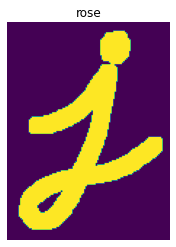

In [34]:
plt.imshow(dilate_np)
plt.axis('off')
plt.title('rose')
plt.show()

In [35]:
# 侵蚀
erosion_np = cv.erode(dilate_np, kernel, iterations = 1)

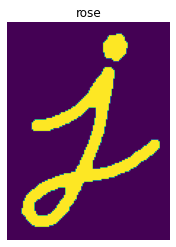

In [36]:
plt.imshow(erosion_np)
plt.axis('off')
plt.title('rose')
plt.show()

### 开运算和闭运算

In [37]:
img = cv.imread('images/6.png')
im = Image.fromarray(img)
im.show()

In [38]:
kernel = np.ones((3,3),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

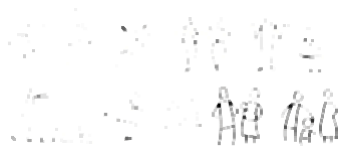

In [39]:
plt.imshow(closing)
plt.axis('off')
plt.show()

In [40]:
# # cv 窗口展示
# cv.imshow('image',closing)
# cv.waitKey(0)
# cv.destroyAllWindows()

## 图像模糊处理

In [41]:
from PIL import ImageFilter

In [49]:
im = Image.open('images/ross.jpg')
# PIL.ImageFilter.BoxBlur(radius)
# PIL.ImageFilter.GaussianBlur(radius=2)
# 很多blur的类型
im_blur=im.filter(ImageFilter.GaussianBlur(20))


In [50]:
im_blur.show()

## 图像生成轮廓图和边缘检测

In [52]:
# 生成轮廓图
im2=im.filter(ImageFilter.CONTOUR)
im2.show()

In [53]:
# 边缘检测
im3=im.filter(ImageFilter.FIND_EDGES)
im3.show()

In [54]:
im.show()

In [55]:
# 浮雕图
im4=im.filter(ImageFilter.EMBOSS)
im4.show()

In [57]:
# 平滑
im5=im.filter(ImageFilter.SMOOTH)
im5.show()